# Imports

In [1]:
import pandas as pd
import gtfs_kit as gk
import helper #homemade function file helper.py
import warnings
import numpy as np
import seaborn as sns
import dataframe_image as dfi

warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

ModuleNotFoundError: No module named 'dataframe_image'

# GTFS Static - Statistics 

## Initial Load GTFS

In [2]:
# Load the gtfs we generated with the various csv file created in the preprocessing
feed = gk.feed.read_feed('../processed_files/preprocessing_gtfs_static.zip',dist_units="km")
routes = gk.routes.get_routes(feed)
stop_times = feed.get_stop_times()
trips = feed.get_trips()
stops = feed.get_stops()
shapes = feed.shapes
calendar_dates = feed.calendar_dates
calendar = feed.calendar

## Basic summary stats


In [4]:
# Stop_Times
stop_times_analytics = stop_times.copy()

Mean of stop_sequence : 8.228435407084644
--------------------------------------------------
Median of stop_sequence : 6.0
--------------------------------------------------
Standard Deviation of stop_sequence : 6.3353424422646984
--------------------------------------------------
Skewness of stop_sequence : 0.8388008533063621


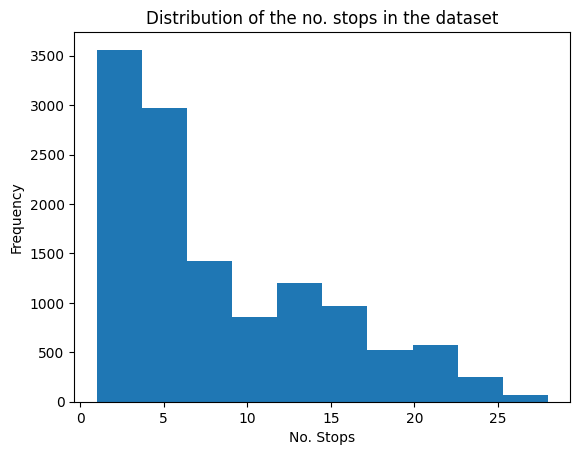

In [5]:
# Basic statistics on the number of stops and
# Distribution of number of stops in the dataset
helper.stop_sequence_statistics(stop_times_analytics)

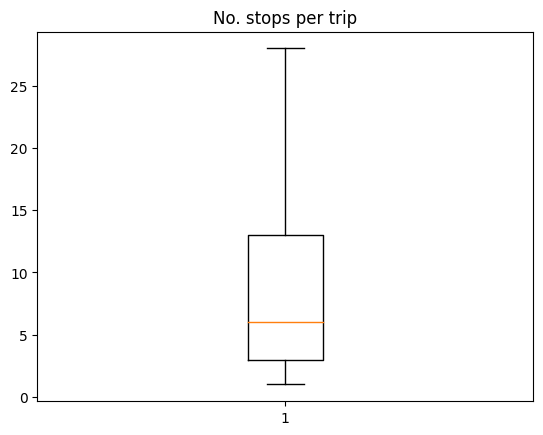

In [6]:
# Number of stops per trip
helper.boxplot_stop_sequence(stop_times_analytics)

In [ ]:
# Analytics on number of stop per trip
result = helper.plot_number_stops(stop_times_analytics)


In [ ]:
# Analytics on number of stop per trip aggregated
helper.aggregated_number_stops(result,3)

In [7]:
# For more precision of calculations we don't consider in the analysis the start stop 
# where speed, time , distance are all equal to 0

stop_times_analytics.drop(stop_times_analytics[(stop_times_analytics['time_diff'] == 0) & 
                              (stop_times_analytics['dist_diff'] == 0) &
                              (stop_times_analytics['speed'] == 0)].index, inplace=True)

Mean of time difference : 0.09473426074549668
--------------------------------------------------
Median of time difference : 0.0833333333333333
--------------------------------------------------
Standard Deviation of time difference : 0.04212796728924718
--------------------------------------------------
Skewness of time difference : 1.3385846988863477
--------------------------------------------------


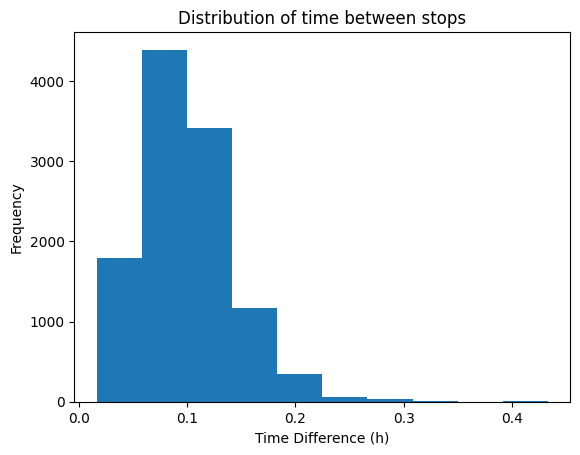

In [8]:
# Basic statistics for time
helper.time_statistics(stop_times_analytics)

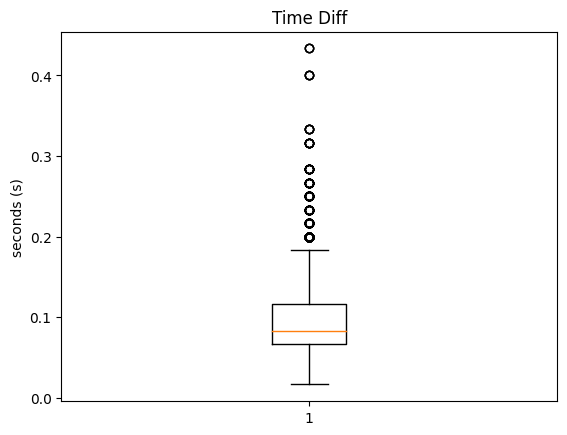

In [9]:
# Box plot on time difference
helper.boxplot_time(stop_times_analytics)

Mean of distance difference : 4.961020172106296
--------------------------------------------------
Median of distance difference : 4.1336200000000005
--------------------------------------------------
Standard Deviation of distance difference : 2.4172609561489917
--------------------------------------------------
Skewness of distance difference : 1.3576810939015815
--------------------------------------------------


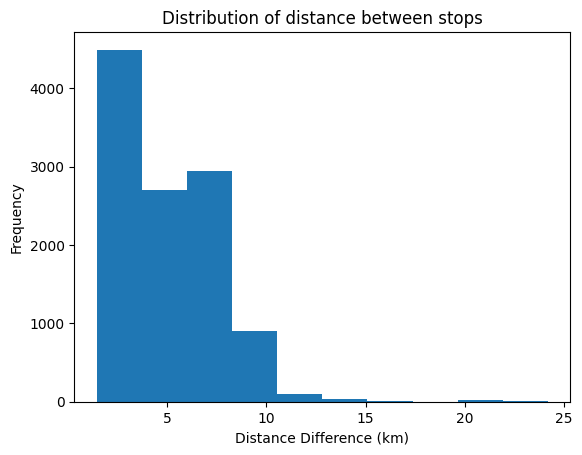

In [10]:
# Basic statistics for distance
helper.distance_statistics(stop_times_analytics)

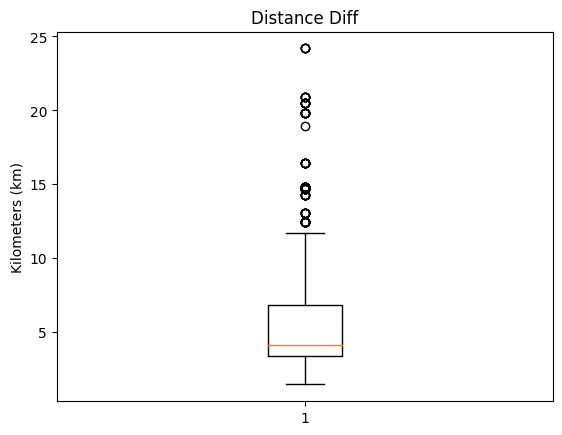

In [11]:
# Box plot on distance difference
helper.boxplot_distance(stop_times_analytics)

Mean of speed : 53.59938025430434
--------------------------------------------------
Median of speed : 52.59824999999985
--------------------------------------------------
Standard Deviation of speed : 14.789070155097463
--------------------------------------------------
Skewness of speed : 0.000696612436200769
--------------------------------------------------


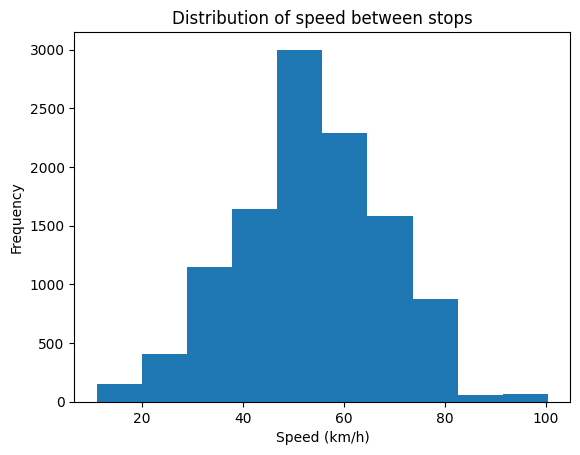

In [12]:
# Basic statistics for speed
helper.speed_statistics(stop_times_analytics)

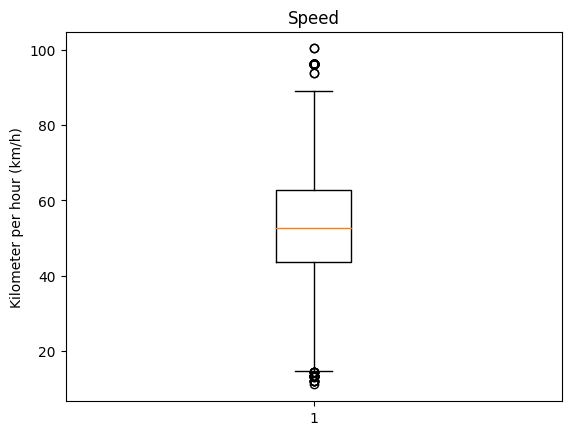

In [13]:
# Number of speed per trip
helper.boxplot_speed(stop_times_analytics)

In [14]:
df_analytics_pisa_lucca_aulla = helper.dataset_for_scatter(stop_times)

In [15]:
df_analytics_pisa_lucca_aulla.head()

,time,distance,speed
0,0.466667,23.13283,50.435526
1,0.466667,23.13283,50.435526
2,0.400000,23.13283,56.967012
3,0.466667,23.13283,50.435526
4,0.516667,23.13283,48.985296


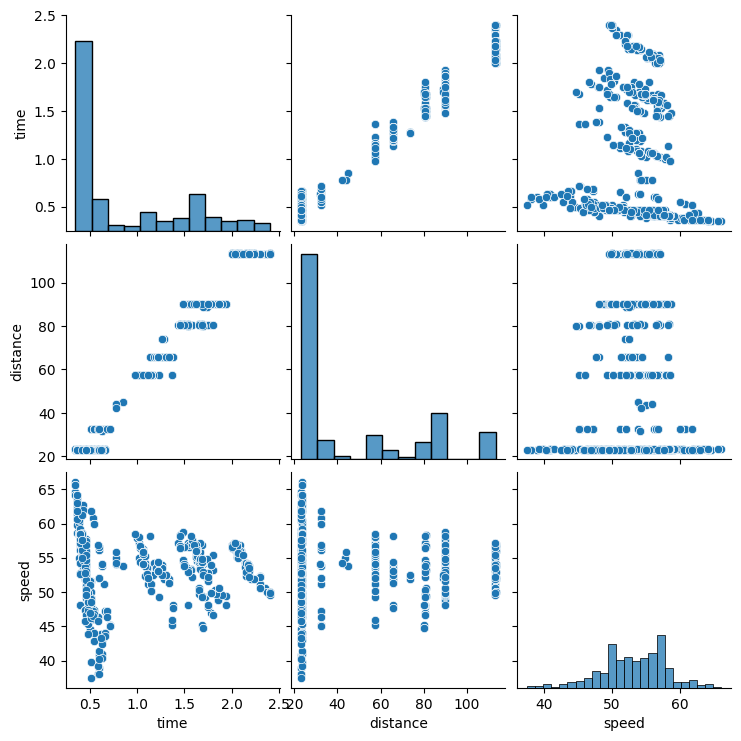

In [16]:
helper.correlogram_time_distance_speed(df_analytics_pisa_lucca_aulla)

## Saving Dataset 

In [ ]:
### Save the preprocessed data as a zip - equal to gtfs.
result = gk.feed.read_feed('../../feed_collection/20161210.gtfs',dist_units="km")
result.routes = routes
result.trips = trips
result.stops = stops
result.stop_times = stop_times
result.calendar_dates = calendar_dates
result.calendar = calendar
result.shapes = shapes
result.write('../processed_files/gtfs_static_da.zip', 9)

## 52 Weeks Analytics

### Tables creation to Analyze Time, Distance and Speed

## The most wonderfull time of the year

In [22]:
## Sorting our stop table in order of real-life stop sequence
stops = stops.assign(order=0)
stops.loc[stops.stop_id == 'S06500_1', 'order'] = 0 #Pisa Centrale
stops.loc[stops.stop_id == 'S06501_1', 'order'] = 1 #Pisa San Rosone
stops.loc[stops.stop_id == 'S06400_1', 'order'] = 2 #San Giuliano Terme
stops.loc[stops.stop_id == 'S06401_1', 'order'] = 3 #Rigoli
stops.loc[stops.stop_id == 'S06402_1', 'order'] = 4 #Ripafratta
stops.loc[stops.stop_id == 'S06404_1', 'order'] = 5 #Lucca
stops.loc[stops.stop_id == 'S06313_1', 'order'] = 6 #S.Pietro A Vico	
stops.loc[stops.stop_id == 'S06312_1', 'order'] = 7 #Ponte a Moriano
stops.loc[stops.stop_id == 'S06310_1', 'order'] = 8 #Decimo
stops.loc[stops.stop_id == 'S06309_1', 'order'] = 9 #Borgo a Mozzano
stops.loc[stops.stop_id == 'S06308_1', 'order'] = 10 #Bagni di Lucca
stops.loc[stops.stop_id == 'S06306_1', 'order'] = 11 #Ghivizzano-Cor
stops.loc[stops.stop_id == 'S06304_1', 'order'] = 12 #Fornaci di Barga
stops.loc[stops.stop_id == 'S06303_1', 'order'] = 13 #Barga-Galligano
stops.loc[stops.stop_id == 'S06302_1', 'order'] = 14 #Castelvecchio P
stops.loc[stops.stop_id == 'S06301_1', 'order'] = 15 #Fosciandora-Ces.	
stops.loc[stops.stop_id == 'S06300_1', 'order'] = 16 #Castelnuovo Gar.
stops.loc[stops.stop_id == 'S06322_1', 'order'] = 17 #Villetta San R.
stops.loc[stops.stop_id == 'S06323_1', 'order'] = 18 #Poggio-Car.-Vag.	
stops.loc[stops.stop_id == 'S06324_1', 'order'] = 19 #Camporiggiano
stops.loc[stops.stop_id == 'S06325_1', 'order'] = 20 #Piazza al Serchio
stops.loc[stops.stop_id == 'S06227_1', 'order'] = 21 #Minucciano P. C.	
stops.loc[stops.stop_id == 'S06226_1', 'order'] = 22 #Equi Terme
stops.loc[stops.stop_id == 'S06225_1', 'order'] = 23 #Monzone
stops.loc[stops.stop_id == 'S06224_1', 'order'] = 24 #Gragnola
stops.loc[stops.stop_id == 'S06223_1', 'order'] = 25 #Fivizzano-Gass.
stops.loc[stops.stop_id == 'S06222_1', 'order'] = 26 #F.Rometta-Solie.
stops.loc[stops.stop_id == 'S06013_1', 'order'] = 27
stops = stops.sort_values(by=['order'],ignore_index=True)


In [23]:
stops

,stop_id,stop_name,stop_lat,stop_lon,stop_code,geometry,order
0,S06500_1,Pisa C.Le,43.708231,10.398389,S06500,POINT (10.39838907912 43.708230929921),0
1,S06501_1,Pisa S.Rossore,43.723446,10.387754,S06501,POINT (10.3877541250271 43.7234463844339),1
2,S06400_1,S.Giuliano Terme,43.764855,10.436916,S06400,POINT (10.4369164336827 43.7648546823558),2
3,S06401_1,Rigoli,43.789761,10.419810,S06401,POINT (10.4198098409817 43.7897610830014),3
4,S06402_1,Ripafratta,43.821737,10.415844,S06402,POINT (10.4158436393462 43.8217371770666),4
5,S06404_1,Lucca,43.837397,10.506153,S06404,POINT (10.5061533088182 43.8373966560588),5
6,S06313_1,S.Pietro A Vico,43.875088,10.531057,S06313,POINT (10.531057347443 43.8750876062192),6
7,S06312_1,Ponte A Moriano,43.908382,10.534134,S06312,POINT (10.5341336491634 43.9083817478074),7
8,S06310_1,Diecimo-Pescagl.,43.959490,10.507770,S06310,POINT (10.5077702305779 43.9594895370443),8
9,S06309_1,Borgo A Mozzano,43.977306,10.541280,S06309,POINT (10.5412795794136 43.9773057078027),9


In [24]:
avgtime_between_stops = pd.DataFrame(0, index=stops['stop_id'].to_list(), columns=stops['stop_id'].to_list())
distance_between_stops = pd.DataFrame(0, index=stops['stop_id'].to_list(), columns=stops['stop_id'].to_list())
avgvelocity_between_stops = pd.DataFrame(0, index=stops['stop_id'].to_list(), columns=stops['stop_id'].to_list())
stop_times = stop_times.drop(columns=['time_diff', 'speed','dist_diff'])


In [25]:
# We create an empty column for time different, speed, distance 
stop_times = stop_times.assign(time=None)
stop_times = stop_times.assign(speed=None)
stop_times = stop_times.assign(dist=None)

In [26]:
stop_ids = stops['stop_id'].to_list()
for stop_id in stop_ids:
    ## Secondary list for calculation 
    secondary_stop_ids = stops['stop_id'].to_list()
    secondary_stop_ids.remove(stop_id)
    for secondary_stop_id in secondary_stop_ids:
        ## I take in all the stop_times were there are those 2 stops
        stop_times_with_stops = stop_times.loc[(stop_times['stop_id'] == stop_id) | (stop_times['stop_id'] == secondary_stop_id)]

        ## Delete all the entries with only one of the two stop_ids
        trip_ids_count = stop_times_with_stops.groupby("trip_id").count().reset_index()
        trip_ids_to_del = trip_ids_count.loc[(trip_ids_count.stop_id < 2)].trip_id.to_list()
        stop_times_with_stops = stop_times_with_stops[~stop_times_with_stops.trip_id.isin(trip_ids_to_del)]

        ## Delete stop_times where stop_sequence of stop_id is < of stop_sequence of secondary_stop 
        ## (ONLY ONE WAY because the reverse will be done automatically)        
        stop_times_with_stops.loc[stop_times_with_stops.stop_id == stop_id, 'sort_value'] = 1
        stop_times_with_stops['sort_value'] = stop_times_with_stops['sort_value'].fillna(0)
        stop_times_with_stops['value_diff'] = stop_times_with_stops.sort_values(['trip_id','sort_value'],ascending=False).groupby('trip_id')['stop_sequence'].diff()

        ### Negative values means that secondary_stop happens before stop_id 
        trip_ids_to_del = stop_times_with_stops.loc[(stop_times_with_stops.value_diff < 0)].trip_id.to_list()
        stop_times_with_stops = stop_times_with_stops[~stop_times_with_stops.trip_id.isin(trip_ids_to_del)]

        # Calculating Distance, Time and avg Speed between last stop and current stop
        stop_times_with_stops = stop_times_with_stops.reset_index()
        stop_times_with_stops = stop_times_with_stops.drop(columns=['index'])
        for index, row  in stop_times_with_stops.iterrows():
            if row['stop_id'] == stop_id:
                stop_times_with_stops['time'][index] = 0
                stop_times_with_stops['dist'][index] = 0
                stop_times_with_stops['speed'][index] = 0
            else:
                time = helper.get_sec(row['arrival_time']) - helper.get_sec(stop_times_with_stops.loc[index - 1,'departure_time'])
                distance = row['shape_dist_traveled'] - stop_times_with_stops.loc[index-1,'shape_dist_traveled']
                time_in_hours = time/3600
                stop_times_with_stops['time'][index] = time_in_hours
                stop_times_with_stops['dist'][index] = distance
                stop_times_with_stops['speed'][index] = (distance / time_in_hours) # Speed in km/h
        if(stop_times_with_stops.shape[0] != 0):
            mean_time = round((stop_times_with_stops['time'].sum()) / (stop_times_with_stops.shape[0] / 2), 2) 
            avg_speed = round((stop_times_with_stops['speed'].sum()) / (stop_times_with_stops.shape[0] / 2), 2) 
            avgtime_between_stops.at[stop_id, secondary_stop_id ] = mean_time
            avgvelocity_between_stops.at[stop_id, secondary_stop_id ] = avg_speed
            distance_between_stops.at[stop_id, secondary_stop_id] = round(distance, 2) 

        #stop_times_with_stops.to_csv(str(stop_id) + "_" + str(secondary_stop_id) + ".csv") 

In [27]:
blue = sns.light_palette('#1E90FF', as_cmap=True)
red = sns.light_palette('#8A2BE2', as_cmap= True)
green = sns.light_palette('seagreen', as_cmap= True)
#avgtime_between_stops.apply(pd.to_numeric).style.background_gradient(cmap=blue)


In [28]:
df_styled = avgtime_between_stops.style.background_gradient(cmap=blue) #adding a gradient based on values in cell
dfi.export(df_styled,"avgtime_between_stops.png")
avgtime_between_stops.to_csv('../csv/time_matrix.csv')

df_styled = avgvelocity_between_stops.style.background_gradient(cmap=red) #adding a gradient based on values in cell
dfi.export(df_styled,"avgvelocity_between_stops.png")
avgvelocity_between_stops.to_csv('../csv/speed_matrix.csv')

df_styled = distance_between_stops.style.background_gradient(cmap=green) #adding a gradient based on values in cell
dfi.export(df_styled,"distance_between_stops.png")
distance_between_stops.to_csv('../csv/distance_matrix.csv')

In [29]:
avgtime_between_stops.head()

,S06500_1,S06501_1,S06400_1,S06401_1,S06402_1,S06404_1,S06313_1,S06312_1,S06310_1,S06309_1,...,S06323_1,S06324_1,S06325_1,S06227_1,S06226_1,S06225_1,S06224_1,S06223_1,S06222_1,S06013_1
S06500_1,0.00,0.07,0.17,0.30,0.32,0.49,0.69,0.77,0.92,1.01,...,1.81,1.87,1.98,2.06,2.15,2.20,2.29,2.38,2.40,2.60
S06501_1,0.10,0.00,0.09,0.21,0.23,0.41,0.60,0.69,0.84,0.93,...,1.72,1.79,1.90,1.98,2.06,2.12,2.20,2.29,2.32,2.51
S06400_1,0.25,0.14,0.00,0.11,0.13,0.30,0.50,0.59,0.73,0.82,...,1.62,1.68,1.80,1.87,1.96,2.01,2.10,2.19,2.21,2.41
S06401_1,0.35,0.21,0.09,0.00,0.06,0.24,0.47,0.52,0.65,0.73,...,1.58,1.64,1.75,1.89,1.98,2.03,2.12,2.18,2.25,2.43
S06402_1,0.41,0.30,0.14,0.07,0.00,0.15,0.38,0.44,0.59,0.69,...,1.48,1.55,1.66,1.71,1.80,1.85,1.94,1.99,2.05,2.25


In [30]:
train_that_stops = pd.DataFrame(0, index=range(1), columns=stops['stop_id'].to_list())
total_waiting_each_stop = pd.DataFrame(0, index=range(1), columns=stops['stop_id'].to_list())

In [31]:
stop_ids = stops['stop_id'].to_list()
for stop_id in stop_ids:
    string_stop_id = str(stop_id)
    stop_times_with_stops = stop_times.loc[(stop_times['stop_id'] == stop_id)]
    # 3 Casi - Partenza - Fermata - Arrivo
    stop_times_with_stops = stop_times_with_stops.reset_index()
    stop_times_with_stops = stop_times_with_stops.drop(columns=['index'])
    for index, row  in stop_times_with_stops.iterrows():
        #Partenza
        if row['stop_sequence'] == 1:
            train_that_stops[string_stop_id] += 1
            total_waiting_each_stop[string_stop_id] += 1
            # Inserire un eventuale minuto alla partenza? 
        #Fermata
        elif helper.get_sec(row['arrival_time']) < helper.get_sec(row['departure_time']):
            waiting_time_seconds = helper.get_sec(row['departure_time']) - helper.get_sec(row['arrival_time'])
            waiting_time_minutes = round(waiting_time_seconds / 60)
            train_that_stops[string_stop_id] += 1
            total_waiting_each_stop[string_stop_id] += waiting_time_minutes
        #Arrivo 
        elif row['stop_sequence'] > 1:
            temp = stop_times.loc[(stop_times['trip_id'] == row['trip_id'])]            
            if row['stop_sequence'] == max(temp['stop_sequence']):
                train_that_stops[string_stop_id] += 1
                total_waiting_each_stop[string_stop_id] += 1
                # Inserire un eventuale minuto alla partenza? 


In [32]:
print(stop_times_with_stops)

        trip_id arrival_time departure_time   stop_id  stop_sequence  \
0   4118_296517     18:20:00       18:20:00  S06013_1             23   
1   4118_296518     13:43:00       13:43:00  S06013_1             21   
2   4118_296521     10:56:00       10:56:00  S06013_1              1   
3   4118_296527     14:04:00       14:04:00  S06013_1              1   
4   4118_296528     10:46:00       10:46:00  S06013_1              1   
5   4118_296529     09:34:00       09:34:00  S06013_1              1   
6   4118_296530     05:53:00       05:53:00  S06013_1              1   
7   4118_296533     15:33:00       15:33:00  S06013_1             22   
8   4118_296538     09:13:00       09:13:00  S06013_1              8   
9   4118_296539     19:01:00       19:01:00  S06013_1             18   
10  4118_296543     17:30:00       17:30:00  S06013_1              1   
11  4118_296544     05:44:00       05:44:00  S06013_1              8   
12  4118_296545     06:32:00       06:32:00  S06013_1           

In [33]:
train_that_stops.to_csv('../csv/n_train_for_stop_vector.csv')
total_waiting_each_stop.to_csv('../csv/total_waiting_time_vector.csv')

In [34]:
train_that_stops

,S06500_1,S06501_1,S06400_1,S06401_1,S06402_1,S06404_1,S06313_1,S06312_1,S06310_1,S06309_1,...,S06323_1,S06324_1,S06325_1,S06227_1,S06226_1,S06225_1,S06224_1,S06223_1,S06222_1,S06013_1
0,44,44,44,11,38,63,29,34,35,33,...,26,32,42,32,28,27,28,20,28,29


In [35]:
total_waiting_each_stop

,S06500_1,S06501_1,S06400_1,S06401_1,S06402_1,S06404_1,S06313_1,S06312_1,S06310_1,S06309_1,...,S06323_1,S06324_1,S06325_1,S06227_1,S06226_1,S06225_1,S06224_1,S06223_1,S06222_1,S06013_1
0,44,44,48,11,38,147,45,34,51,33,...,26,32,66,44,28,27,44,20,28,29
